# Introduction aux GANs (Generative Adversarial Networks)

## Qu'est-ce qu'un GAN ?

Un **Generative Adversarial Network (GAN)** est un type de modèle d'apprentissage profond conçu pour générer des données nouvelles et réalistes en imitant la distribution d'un jeu de données existant. Introduit par Ian Goodfellow en 2014, un GAN repose sur deux réseaux de neurones qui s'affrontent dans un jeu à somme nulle :

1. **Le générateur ($G$)** : Produit des données synthétiques à partir d'un bruit aléatoire.
2. **Le discriminateur ($D$)** : Tente de distinguer les données réelles des données générées.

Ces deux réseaux sont entraînés ensemble de manière adversaire : le générateur s'améliore pour tromper le discriminateur, tandis que ce dernier s'améliore pour mieux détecter les données générées.

---

## Fonctionnement d'un GAN

### Étape 1 : Générateur
Le générateur prend une entrée aléatoire $z$ provenant d'une distribution $p_z(z)$, telle qu'une distribution normale ou uniforme, et produit une donnée synthétique $G(z; \theta_g)$, où $\theta_g$ représente les paramètres du générateur.

### Étape 2 : Discriminateur
Le discriminateur reçoit à la fois des données réelles $x \sim p_{\text{data}}(x)$ et des données générées $G(z)$. Il sort une probabilité $D(x)$, représentant la confiance que $x$ provient des données réelles.

---

## Fonction de coût

La formation des GANs est basée sur une fonction objectif en deux parties :

1. **Pour le discriminateur :**
   $$
   \max_{\theta_D} \Big( \mathbb{E}_{x \sim p_{\text{data}}(x)} \big[ \log D(x) \big] + \mathbb{E}_{z \sim p_z(z)} \big[ \log(1 - D(G(z))) \big] \Big)
   $$

2. **Pour le générateur :**
   $$
   \min_{\theta_G} \mathbb{E}_{z \sim p_z(z)} \big[ \log(1 - D(G(z))) \big]
   $$

Dans la pratique, pour stabiliser l'entraînement, on modifie souvent la fonction de coût du générateur pour maximiser $\log(D(G(z)))$ :

$$
\max_{\theta_G} \mathbb{E}_{z \sim p_z(z)} \big[ \log D(G(z)) \big]
$$

---

## Schéma du GAN

Voici une illustration simplifiée du fonctionnement d'un GAN :



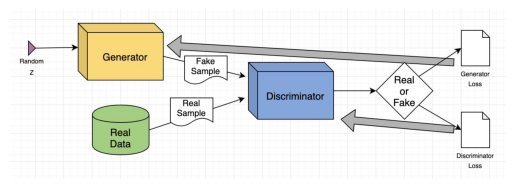

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("schemagan.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from gan_functions import *

### 📥 Importation et Prétraitement des Données

In [3]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalisation
x_train = x_train.reshape((-1, 28, 28, 1))

### Implémentation du Générateur 🎨 et du Discriminateur 🕵️‍♂️

Dans cette implémentation, nous définissons :

1. **Le `generator` 🎨 :** Produit des données synthétiques à partir d'un bruit aléatoire.
2. **Le `discriminator` 🕵️‍♂️ :** Distingue les données réelles des données générées.


In [4]:
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gan = tf.keras.Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

Entraînement du GAN 🎯

In [5]:
train_gan(gan, generator, discriminator, x_train)

2/2 [==============================] - 0s 4ms/step
Epoch 0, Discriminator Loss: [0.8677628636360168, 0.515625], Generator Loss: 0.6983270645141602
2/2 [==============================] - 0s 1ms/step
Epoch 500, Discriminator Loss: [0.08898435533046722, 0.984375], Generator Loss: 4.309535026550293
2/2 [==============================] - 0s 2ms/step
Epoch 1000, Discriminator Loss: [0.23150931298732758, 0.8984375], Generator Loss: 2.853299140930176
2/2 [==============================] - 0s 2ms/step
Epoch 1500, Discriminator Loss: [0.1986205130815506, 0.9140625], Generator Loss: 2.988555669784546
2/2 [==============================] - 0s 2ms/step
Epoch 2000, Discriminator Loss: [0.31432148814201355, 0.8515625], Generator Loss: 2.683668613433838
2/2 [==============================] - 0s 2ms/step
Epoch 2500, Discriminator Loss: [0.2582094669342041, 0.890625], Generator Loss: 3.122692584991455
2/2 [==============================] - 0s 2ms/step
Epoch 3000, Discriminator Loss: [0.7242612838745117,

1/1 [==============================] - 0s 78ms/step


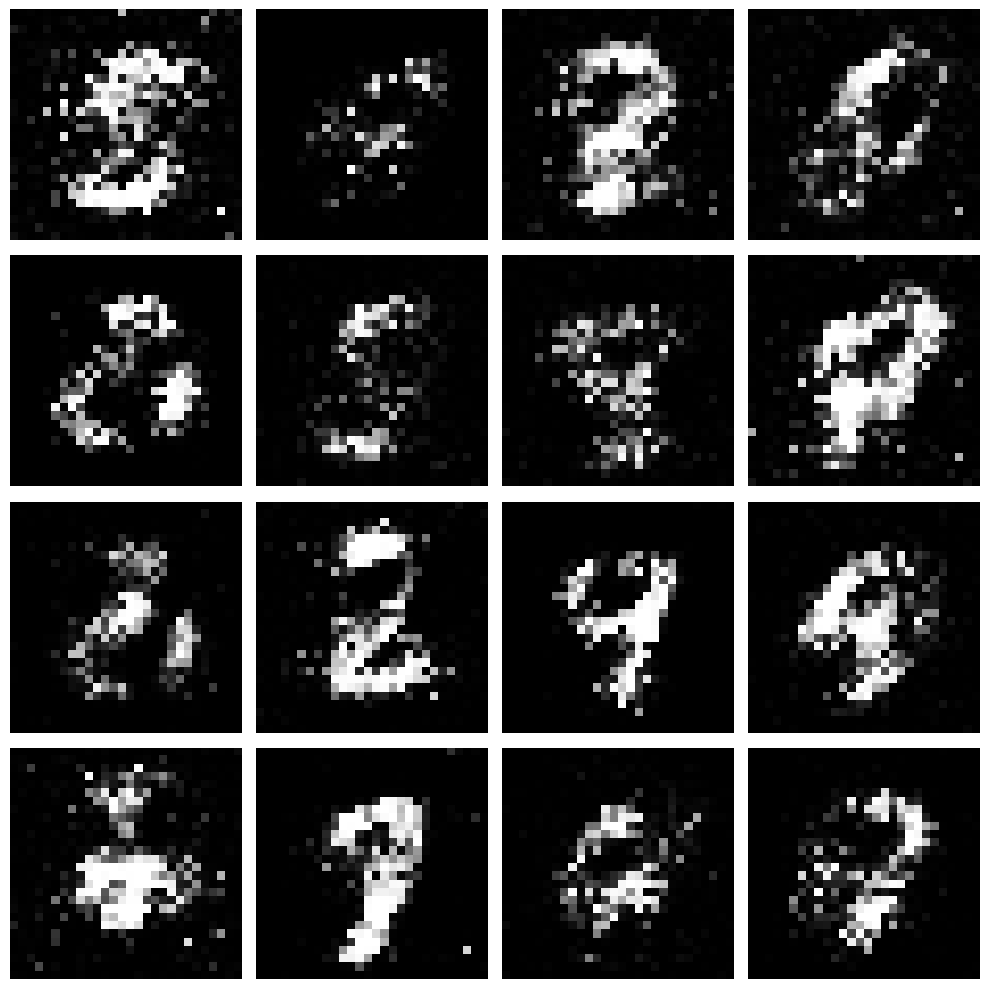

In [6]:
plot_generated_images(generator)

# Tentative d'Amélioration d'un GAN 

Dans cette implémentation, nous apportons plusieurs améliorations au GAN classique pour générer des images plus réalistes et stabiliser l'entraînement. Ces modifications concernent **l'architecture, la fonction de perte, et l'optimisation**.

---

## Améliorations apportées

### 1. **Architecture du Générateur 🎨**
- **Couches transposées convolutives :** Ajoutées pour générer des images plus réalistes grâce à une meilleure capture des détails et motifs.
- **Activation LeakyReLU :** Remplacement de ReLU par LeakyReLU pour éviter les gradients nuls.

### 2. **Architecture du Discriminateur 🕵️‍♂️**
- **Couches convolutives :** Utilisées pour mieux capturer les motifs dans les images, rendant le discriminateur plus performant.
- **Dropout :** Ajouté pour réduire le risque de surapprentissage.

### 3. **Fonction de perte 📉**
- **BinaryCrossentropy(from_logits=True) :** Permet une stabilisation accrue de l'entraînement grâce à une gestion adaptée des logits.

### 4. **Optimisation ⚙️**
- **Taux d'apprentissage ajusté :** Utilisation de `Adam(learning_rate=1e-4)` pour une meilleure convergence.

---

## Bénéfices attendus
- **Images plus réalistes :** Grâce aux couches transposées convolutives et à l'activation LeakyReLU.
- **Entraînement plus stable :** Avec la fonction de perte adaptée et le taux d'apprentissage optimisé.
- **Réduction du surapprentissage :** Grâce à l'ajout de dropout dans le discriminateur.

Ces modifications combinées permettent d'améliorer à la fois la qualité des images générées et la stabilité globale du GAN lors de l'entraînement.


In [7]:
generator = build_generator_best()
discriminator = build_discriminator_best()
discriminator.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
gan = tf.keras.Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

Entraînement du GAN 🎯

In [8]:
train_gan(gan, generator, discriminator, x_train)

2/2 [==============================] - 0s 24ms/step
Epoch 0, Discriminator Loss: 0.6996482610702515, Generator Loss: 0.6807831525802612
2/2 [==============================] - 0s 34ms/step
Epoch 500, Discriminator Loss: 0.033293917775154114, Generator Loss: 0.003208208829164505
2/2 [==============================] - 0s 33ms/step
Epoch 1000, Discriminator Loss: 0.39709845185279846, Generator Loss: 1.3830490112304688
2/2 [==============================] - 0s 44ms/step
Epoch 1500, Discriminator Loss: 0.6572179794311523, Generator Loss: 0.736702024936676
2/2 [==============================] - 0s 32ms/step
Epoch 2000, Discriminator Loss: 0.6681629419326782, Generator Loss: 0.6471927165985107
2/2 [==============================] - 0s 35ms/step
Epoch 2500, Discriminator Loss: 0.799724817276001, Generator Loss: 0.7827195525169373
2/2 [==============================] - 0s 39ms/step
Epoch 3000, Discriminator Loss: 0.7798588871955872, Generator Loss: 0.8917540311813354
2/2 [=======================

1/1 [==============================] - 0s 129ms/step


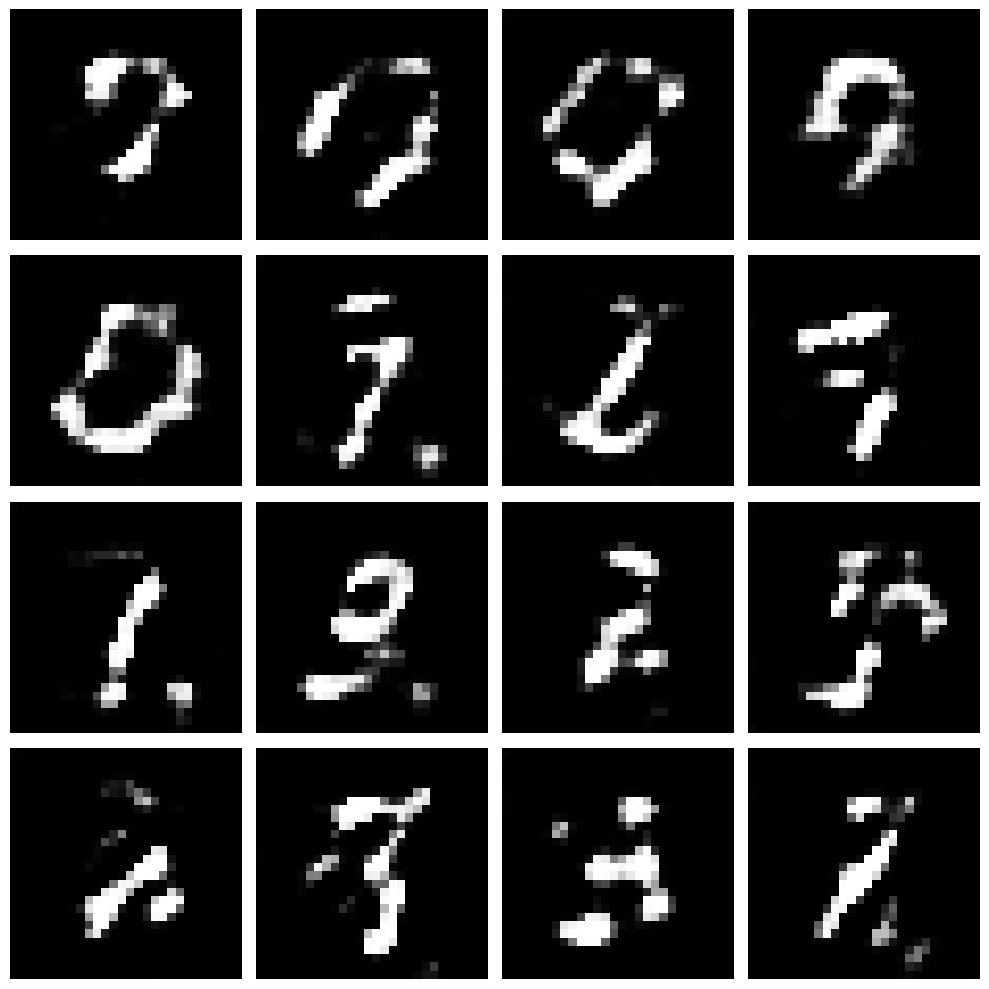

In [9]:
plot_generated_images(generator)


>Les images sont plus net !